In [4]:
import os

os.chdir('/Users/christopherahn/Documents/QBIO_490/qbio-490-Christopher-Ahn/final_project_group3/outputs')

In [5]:
import cptac
cptac.download(dataset="Gbm")
gbm = cptac.Gbm()

In [70]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder


In [6]:
gbm.list_data()

Below are the dataframes contained in this dataset and their dimensions:

acetylproteomics
	109 rows
	18767 columns
circular_RNA
	99 rows
	3670 columns
clinical
	115 rows
	29 columns
CNV
	98 rows
	19907 columns
derived_molecular
	109 rows
	19 columns
experimental_design
	115 rows
	7 columns
gene_fusion
	2090 rows
	8 columns
lipidomics
	88 rows
	582 columns
metabolomics
	87 rows
	134 columns
miRNA
	106 rows
	2883 columns
phosphoproteomics
	109 rows
	101266 columns
proteomics
	109 rows
	11141 columns
somatic_mutation
	5774 rows
	3 columns
transcriptomics
	108 rows
	60483 columns


In [38]:
protein_data = gbm.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 
protein_data

Name,A1BG,A2M,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,0.077630,0.487228,-0.254208,-0.144373,0.551881,-0.025276,-0.467451,-0.089511,-0.078806,0.329603,...,NaN,-0.047437,-0.105908,-0.347076,NaN,0.459635,0.079452,-0.784983,-0.488441,0.167990
C3L-00365,-0.145975,0.798796,0.184242,-0.470603,NaN,0.390211,0.245466,-0.609998,0.118625,-0.086927,...,NaN,0.161975,-0.213093,0.235571,NaN,0.107421,0.048724,0.138403,-0.290141,0.405037
C3L-00674,0.821991,1.096470,-0.094421,-0.106304,0.084578,0.176402,-0.248151,0.014061,-0.699773,-0.638462,...,NaN,-0.065534,-0.306717,0.879991,NaN,0.883564,-0.172222,0.011876,-0.131889,-0.503581
C3L-00677,-0.064567,0.129385,0.047751,-0.118187,0.237434,NaN,0.303847,0.322163,-0.555479,-0.363414,...,-0.062127,-0.254535,0.463653,0.580230,0.503044,-0.604986,0.178077,-0.720059,-0.150197,-0.268715
C3L-01040,-0.763691,-1.031834,-0.217194,-0.695701,0.184173,-0.474816,-0.051789,0.344842,-0.642746,0.068863,...,NaN,-0.092502,0.010639,-0.465079,NaN,-0.500083,0.112651,1.004660,-0.230304,-0.102416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-RN5K.N,-1.624156,-1.163916,-0.570896,0.608478,0.756814,NaN,0.136388,1.792089,-0.047550,0.595335,...,NaN,0.298664,-0.403930,-0.482597,0.240966,NaN,0.609314,-1.293464,0.225910,-0.013637
PT-RU72.N,-1.452245,-1.147384,-0.373231,0.584371,NaN,-1.670928,-0.074499,1.893627,-0.369483,0.244199,...,NaN,0.155988,0.002551,-0.834434,NaN,-0.073908,0.637394,-0.795886,0.326046,-0.217014
PT-UTHO.N,-1.902994,-1.162469,-0.411892,0.534934,NaN,0.598046,-0.382636,1.997332,-0.134316,0.500731,...,NaN,0.016857,-0.171858,-0.462233,NaN,1.278683,0.616285,-0.734952,0.339283,-0.419138


In [39]:
rna_data = gbm.get_transcriptomics()
clinical_data = gbm.get_clinical()

In [8]:
import mygene
cptac.download('Gbm')
gbm = cptac.Gbm()
mg = mygene.MyGeneInfo()

rna = gbm.get_transcriptomics()
means = rna.mean()
rna = rna.drop(rna.iloc[:, np.where(means==0)[0]], axis=1)
rna = rna/rna.mean()
for row in rna.index:
   rna.loc[row, :] = np.log2(rna.loc[row, :])
rna = rna.replace(-np.inf, np.nan)

rna.columns = rna.columns.get_level_values(1).str.split('.').str[0]
gene_names = mg.querymany(rna.columns, scopes=['ensembl.gene'], returnall=False)

names = []
dupes = pd.Series(['test'])
for i in gene_names:
    if i['query'] not in dupes.values:
        try:
            names.append(i['symbol'])
        except:
            names.append(i['query'])
    dupes.loc[len(dupes)] = i['query']
rna.columns = names
rna = rna.loc[:,~rna.columns.duplicated()].copy()
rna = rna.drop('Y_RNA', axis=1)

/Users/christopherahn/miniconda3/envs/qbio_490_Christopher_Ahn/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-22000...done.
querying 22001-23000...done.
querying 23001-24000...done.
querying 24001-25000...done.
querying 25001-26000...done.
querying 26001-27000...done.
querying 27001-28000...done.
querying 28001-29000...done.
querying 29001-30000...done.
querying 30001-31000...done.
querying 31001-32000...done.
querying 32001-33000...done.
querying 33001-34000...done.
querying 34001-35000...done.
queryin

In [28]:
name_intersects = np.intersect1d(protein_data.index, rna.index)
name_intersects

array(['C3L-00104', 'C3L-00365', 'C3L-00674', 'C3L-00677', 'C3L-01040',
       'C3L-01043', 'C3L-01045', 'C3L-01046', 'C3L-01048', 'C3L-01049',
       'C3L-01061', 'C3L-01142', 'C3L-01146', 'C3L-01149', 'C3L-01154',
       'C3L-01155', 'C3L-01156', 'C3L-01157', 'C3L-01327', 'C3L-01834',
       'C3L-01887', 'C3L-02041', 'C3L-02465', 'C3L-02504', 'C3L-02542',
       'C3L-02642', 'C3L-02704', 'C3L-02705', 'C3L-02707', 'C3L-02708',
       'C3L-02900', 'C3L-02955', 'C3L-02970', 'C3L-02984', 'C3L-03260',
       'C3L-03266', 'C3L-03387', 'C3L-03390', 'C3L-03392', 'C3L-03400',
       'C3L-03405', 'C3L-03407', 'C3L-03681', 'C3L-03727', 'C3L-03728',
       'C3L-03744', 'C3L-03748', 'C3L-03968', 'C3L-04084', 'C3N-00661',
       'C3N-00662', 'C3N-00663', 'C3N-00665', 'C3N-01192', 'C3N-01196',
       'C3N-01334', 'C3N-01364', 'C3N-01366', 'C3N-01367', 'C3N-01368',
       'C3N-01369', 'C3N-01505', 'C3N-01515', 'C3N-01517', 'C3N-01518',
       'C3N-01798', 'C3N-01814', 'C3N-01815', 'C3N-01816', 'C3N-

In [30]:
shared_rna_prot = np.intersect1d(rna.columns, protein_data.columns)

rna_shared = rna.loc[name_intersects, shared_rna_prot]
prot_shared = protein_data.loc[name_intersects, shared_rna_prot]

In [60]:
gene_names = ["PTEN", "TP53", "EGFR", "A2M", "NF1", "AAK1", "RYR2", "PIK3CA", "PIK3R1", "SLC2A5", "ALDOB", "CDK1", "CDK2", "AAMDC", "IDH1", "IDH2", "MDM2","ANK1", "ZSCAN31", "A1BG"]

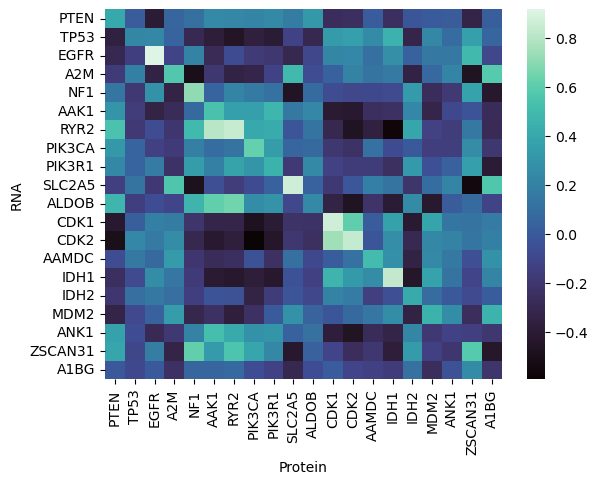

In [62]:
ncomparisons = 20

corr_df = pd.DataFrame(np.ndarray(shape=(ncomparisons, ncomparisons), dtype=np.float16),
                      index = gene_names,
                      columns = gene_names)

for g1 in gene_names:
    for g2 in gene_names:
        corr, pval = stats.spearmanr(rna_shared[g1], prot_shared[g2], nan_policy='omit')
        corr_df.loc[g1,g2] = corr

plot = sns.heatmap(
    corr_df,
    cmap='mako',
)
plot.set_xlabel('Protein', fontsize=10)
plot.set_ylabel('RNA', fontsize=10)
plt.savefig('Heatmap.png', bbox_inches='tight')

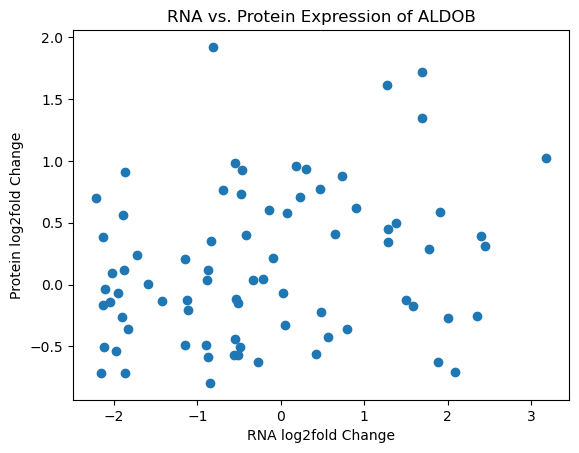

In [73]:
plt.scatter(rna_shared.loc[:,'ALDOB'],prot_shared.loc[:,'ALDOB'])
plt.xlabel("RNA log2fold Change")
plt.ylabel("Protein log2fold Change")
plt.title("RNA vs. Protein Expression of ALDOB")
plt.savefig('ALDOB_rna_vs_prot.png', bbox_inches='tight')

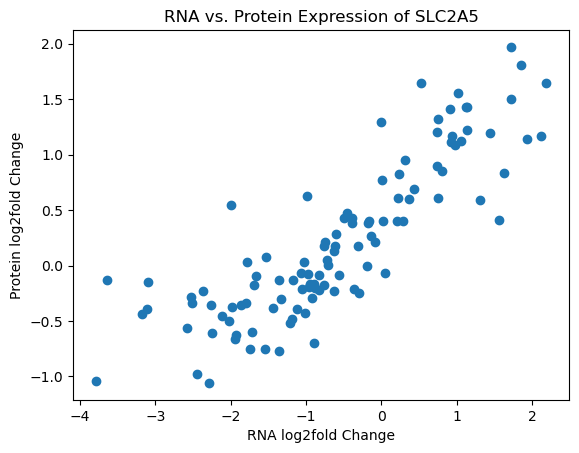

In [74]:
plt.scatter(rna_shared.loc[:,'SLC2A5'],prot_shared.loc[:,'SLC2A5'])
plt.xlabel("RNA log2fold Change")
plt.ylabel("Protein log2fold Change")
plt.title("RNA vs. Protein Expression of SLC2A5")
plt.savefig('SLC2A5_rna_vs_prot.png', bbox_inches='tight')

In [76]:
clinical = gbm.get_clinical()

In [108]:
mutations = gbm.get_somatic_mutation()

In [131]:
patients_df = pd.DataFrame(
    columns=['PTEN_Mutations', 'TP53_Mutations','EGFR_Mutations', 'TTN_Mutations', 'MUC16_Mutations', 'vital_status'], 
    index=clinical.index)

In [132]:
patients_df

,PTEN_Mutations,TP53_Mutations,EGFR_Mutations,TTN_Mutations,MUC16_Mutations,vital_status
Patient_ID,,,,,,
C3L-00104,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00365,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00674,NaN,NaN,NaN,NaN,NaN,NaN
C3L-00677,NaN,NaN,NaN,NaN,NaN,NaN
C3L-01040,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
PT-RN5K.N,NaN,NaN,NaN,NaN,NaN,NaN
PT-RU72.N,NaN,NaN,NaN,NaN,NaN,NaN
PT-UTHO.N,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
PTEN_mutat_mask = mutations.loc[:, 'Gene'] == 'PTEN'
PTEN_mutations = mutations.loc[PTEN_mutat_mask, :]
PTEN_mutations.head()

Name,Gene,Mutation,Location
Patient_ID,,,
C3L-00104,PTEN,Missense_Mutation,p.G251D
C3L-00674,PTEN,Missense_Mutation,p.C136Y
C3L-00677,PTEN,Missense_Mutation,p.R173H
C3L-01043,PTEN,Missense_Mutation,p.I33V
C3L-01046,PTEN,Splice_Site,p.X70_splice


In [136]:
patients_with_mutation = PTEN_mutations.index
PTEN_counts = patients_with_mutation.value_counts()

C3L-00104    1
C3L-03266    1
C3N-02784    1
C3N-02769    1
C3N-02256    1
C3N-01814    1
C3N-01518    1
C3N-01515    1
C3N-01505    1
C3N-01368    1
C3N-01366    1
C3L-03727    1
C3L-03400    1
C3L-03260    1
C3L-00674    1
C3L-02707    1
C3L-02705    1
C3L-02504    1
C3L-01156    1
C3L-01155    1
C3L-01146    1
C3L-01061    1
C3L-01049    1
C3L-01046    1
C3L-01043    1
C3L-00677    1
C3N-03183    1
Name: Patient_ID, dtype: int64


In [137]:
patients_df.loc[PTEN_counts.index, 'PTEN_Mutations'] = PTEN_counts
patients_df.loc[patients_df.index.difference(PTEN_counts.index), 'PTEN_Mutations'] = 0

In [139]:
TP53_mutat_mask = mutations.loc[:, 'Gene'] == 'TP53'
TP53_mutations = mutations.loc[TP53_mutat_mask, :]
patients_with_mutation = TP53_mutations.index
TP53_counts = patients_with_mutation.value_counts()
patients_df.loc[TP53_counts.index, 'TP53_Mutations'] = TP53_counts
patients_df.loc[patients_df.index.difference(TP53_counts.index), 'TP53_Mutations'] = 0

In [140]:
EGFR_mutat_mask = mutations.loc[:, 'Gene'] == 'EGFR'
EGFR_mutations = mutations.loc[EGFR_mutat_mask, :]
patients_with_mutation = EGFR_mutations.index
EGFR_counts = patients_with_mutation.value_counts()
patients_df.loc[EGFR_counts.index, 'EGFR_Mutations'] = EGFR_counts
patients_df.loc[patients_df.index.difference(EGFR_counts.index), 'EGFR_Mutations'] = 0

In [141]:
TTN_mutat_mask = mutations.loc[:, 'Gene'] == 'TTN'
TTN_mutations = mutations.loc[TTN_mutat_mask, :]
patients_with_mutation = TTN_mutations.index
TTN_counts = patients_with_mutation.value_counts()
patients_df.loc[TTN_counts.index, 'TTN_Mutations'] = TTN_counts
patients_df.loc[patients_df.index.difference(TTN_counts.index), 'TTN_Mutations'] = 0

In [142]:
MUC16_mutat_mask = mutations.loc[:, 'Gene'] == 'MUC16'
MUC16_mutations = mutations.loc[MUC16_mutat_mask, :]
patients_with_mutation = MUC16_mutations.index
MUC16_counts = patients_with_mutation.value_counts()
patients_df.loc[MUC16_counts.index, 'MUC16_Mutations'] = MUC16_counts
patients_df.loc[patients_df.index.difference(MUC16_counts.index), 'MUC16_Mutations'] = 0

In [143]:
patients_df

,PTEN_Mutations,TP53_Mutations,EGFR_Mutations,TTN_Mutations,MUC16_Mutations,vital_status
Patient_ID,,,,,,
C3L-00104,1,1,0,0,0,NaN
C3L-00365,0,1,1,0,0,NaN
C3L-00674,1,0,0,0,0,NaN
C3L-00677,1,2,0,1,1,NaN
C3L-01040,0,0,0,0,1,NaN
...,...,...,...,...,...,...
PT-RN5K.N,0,0,0,0,0,NaN
PT-RU72.N,0,0,0,0,0,NaN
PT-UTHO.N,0,0,0,0,0,NaN


In [164]:
vital_status = np.where(clinical.loc[:,'cause_of_death'].isna(), '1.0', '0.0')

array(['1.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0',
       '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0',
       '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '1.0',
       '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0',
       '1.0', '1.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '1.0', '0.0', '0.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0'], dtype='<U3')

In [165]:
patients_df.loc[:, 'vital_status'] = vital_status[:]
patients_df

,PTEN_Mutations,TP53_Mutations,EGFR_Mutations,TTN_Mutations,MUC16_Mutations,vital_status
Patient_ID,,,,,,
C3L-00104,1,1,0,0,0,1.0
C3L-00365,0,1,1,0,0,1.0
C3L-00674,1,0,0,0,0,0.0
C3L-00677,1,2,0,1,1,0.0
C3L-01040,0,0,0,0,1,1.0
...,...,...,...,...,...,...
PT-RN5K.N,0,0,0,0,0,0.0
PT-RU72.N,0,0,0,0,0,0.0
PT-UTHO.N,0,0,0,0,0,0.0


In [167]:
encoder = OrdinalEncoder()

encoded_df = patients_df

encoded_columns = encoder.fit_transform(patients_df.loc[:, ['PTEN_Mutations', 'TP53_Mutations','EGFR_Mutations', 'TTN_Mutations', 'MUC16_Mutations', 'vital_status']])
encoded_df.loc[:, ['PTEN_Mutations', 'TP53_Mutations','EGFR_Mutations', 'TTN_Mutations', 'MUC16_Mutations', 'vital_status']] = encoded_columns

encoded_df

/var/folders/c3/jy1t8_0j0pj4xy8jhw_hv9k80000gn/T/ipykernel_93749/507226371.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  encoded_df.loc[:, ['PTEN_Mutations', 'TP53_Mutations','EGFR_Mutations', 'TTN_Mutations', 'MUC16_Mutations', 'vital_status']] = encoded_columns


,PTEN_Mutations,TP53_Mutations,EGFR_Mutations,TTN_Mutations,MUC16_Mutations,vital_status
Patient_ID,,,,,,
C3L-00104,1.0,1.0,0.0,0.0,0.0,1.0
C3L-00365,0.0,1.0,1.0,0.0,0.0,1.0
C3L-00674,1.0,0.0,0.0,0.0,0.0,0.0
C3L-00677,1.0,2.0,0.0,1.0,1.0,0.0
C3L-01040,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...
PT-RN5K.N,0.0,0.0,0.0,0.0,0.0,0.0
PT-RU72.N,0.0,0.0,0.0,0.0,0.0,0.0
PT-UTHO.N,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
target_df = encoded_df.iloc[:,5]
train_df = encoded_df.iloc[:,0:5]
target_df = target_df.tolist()

X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, train_size=0.8)


classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = sum(y_pred == y_test) / len(y_test)

print(f'Using the GaussianNB, the model was able to accurately predict {accuracy * 100}% of the test set.')

Using the GaussianNB, the model was able to accurately predict 73.91304347826086% of the test set.


In [40]:
shared_clinical_prot = np.intersect1d(clinical_data.index, protein_data.index)

protein1_shared = protein_data.loc[shared_clinical_prot,:]
clinical_shared = clinical_data.loc[shared_clinical_prot,:]

Name,Sample_Tumor_Normal,age,gender,height,weight,bmi,country_of_origin,race,ethnicity,ethnicity_self_identify,...,cause_of_death,lost_to_follow_up,tumor_reoccur_after_treatment,path_diag_to_tumor_reoccur_days,expert_path_review,expert_path_review_num_segments,expert_path_review_details,excluded_in_downstream_analysis,exclusion_reason,Stage
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,Tumor,58.0,Male,188.00,115.00,32.54,United States,White,Not-Hispanic or Latino,Caucasian,...,NaN,No,False,NaN,PASS,1.0,NaN,False,NaN,IV
C3L-00365,Tumor,59.0,Female,162.00,54.00,20.61,United States,White,Not-Hispanic or Latino,Caucasian,...,NaN,No,NaN,NaN,FAIL,1.0,C3L-00365-01(low tumor nuclei),False,NaN,IV
C3L-00674,Tumor,45.0,Male,193.00,102.00,27.44,NaN,White,Not-Hispanic or Latino,Caucasian,...,GBM,No,True,244.0,PASS,1.0,NaN,False,NaN,IV
C3L-00677,Tumor,69.0,Female,164.00,52.00,19.32,NaN,White,Not-Hispanic or Latino,Caucasian,...,GBM,No,NaN,NaN,PASS,1.0,NaN,False,NaN,IV
C3L-01040,Tumor,77.0,Female,170.00,70.00,24.22,Russia,NaN,NaN,Caucasian,...,NaN,Yes,False,NaN,PASS,2.0,NaN,False,NaN,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-RN5K.N,Normal,56.0,Female,162.56,49.90,18.88,NaN,White,Not Hispanic or Latino,NaN,...,Emphysema,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,IV
PT-RU72.N,Normal,59.0,Female,162.56,63.05,23.86,NaN,Asian,NaN,NaN,...,Prescription drug overdose,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,IV
PT-UTHO.N,Normal,68.0,Male,182.88,62.87,18.80,NaN,White,NaN,NaN,...,Heart disease,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,IV


In [59]:
young_mask = clinical_shared.loc[:,'age'] <= 35
middle_mask = np.where((clinical_shared.loc[:,'age'] <= 50), np.where((clinical_shared.loc[:,'age'] > 35), True, False), False)
old_mask = clinical_shared.loc[:,'age'] > 50

array([False, False,  True, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False])

In [67]:
young = (protein_data.loc[young_mask,'ALDOB']).dropna()
middle = (protein_data.loc[middle_mask,'ALDOB']).dropna()
old = (protein_data.loc[old_mask,'ALDOB']).dropna()

data = [old.values, middle.values, young.values] # our boxplot function will require an array (or an array of arrays)

[array([ 0.44822397,  0.09274227, -0.06730045, -0.70412382,  0.26549066,
         0.76601971, -0.66513221,  0.32968744, -0.50517463, -0.35731961,
         0.16557245, -0.79651293, -0.13173768,  0.00558065,  0.3893666 ,
         0.60148375,  0.03917692, -0.0672487 , -0.48832189,  0.81906551,
         0.93790962, -0.4460808 , -0.71703249,  0.31397929,  0.2146303 ,
         0.40719409,  1.92366701, -0.62598953, -0.35738256,  0.24027406,
         0.38164146, -0.03358793, -0.30347843,  0.70027928, -0.11920668,
        -0.14300234, -0.20798025,  0.04283545, -0.11372911,  0.03661616,
        -0.05583876, -0.6287029 , -0.64275828,  0.35291394, -0.47095985,
         0.59096788,  0.92862249,  0.7231603 , -0.56688948,  0.57782197,
        -0.71861214, -0.77931189,  0.02562449,  0.44803281, -0.27080976,
        -0.16441037, -0.32943382, -0.48824891, -0.17053445, -0.30113174,
        -0.57239165, -0.71287518, -0.35810407,  0.09726883, -0.15261153,
         0.95936181, -0.42111934,  0.34213414,  1.0

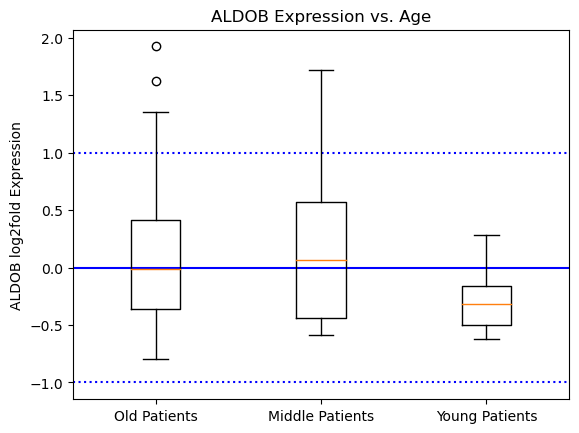

In [68]:
fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(data) # data goes here
plt.xticks([1, 2, 3], ["Old Patients", "Middle Patients", "Young Patients"]) # use \n for new line if desired
plt.ylabel('ALDOB log2fold Expression')

plt.title("ALDOB Expression vs. Age")
plt.savefig('ALDOB_age_boxplot.png', bbox_inches='tight')
plt.show()

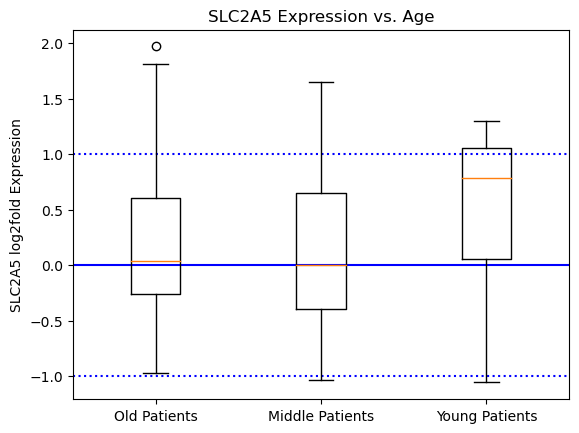

In [69]:
young = (protein_data.loc[young_mask,'SLC2A5']).dropna()
middle = (protein_data.loc[middle_mask,'SLC2A5']).dropna()
old = (protein_data.loc[old_mask,'SLC2A5']).dropna()

data = [old.values, middle.values, young.values]

fig, ax = plt.subplots()

plt.axhline(y = 0, color = 'blue', linestyle = '-')
plt.axhline(y = -1, color = 'blue', linestyle = ':')
plt.axhline(y = 1, color = 'blue', linestyle = ':')


bp = ax.boxplot(data) # data goes here
plt.xticks([1, 2, 3], ["Old Patients", "Middle Patients", "Young Patients"]) # use \n for new line if desired
plt.ylabel('SLC2A5 log2fold Expression')

plt.title("SLC2A5 Expression vs. Age")
plt.savefig('SLC2A5_age_boxplot.png', bbox_inches='tight')
plt.show()